In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''Deep Learning for Neural Networks'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  # for building neural nets

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # scaler may help for SVMs/KNN

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix   # Performance metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


%matplotlib inline

In [4]:
# mount my drive with the files link etc..
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MLFinal/star_gazer_tableau.csv'
data = pd.read_csv(file_path)
data.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
# Drop unnecessary identifier columns
drop_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
data = data.drop(columns=drop_columns)

data.head(10)


,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,QSO,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,QSO,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,GALAXY,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,GALAXY,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008


In [7]:
data.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [8]:
#Checking for null values to determine completeness of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [9]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


In [10]:
X = data.drop('class', axis=1)
y = data['class']

In [11]:
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [12]:
#80% train, 20% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# 10% val and 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<Axes: xlabel='class', ylabel='count'>

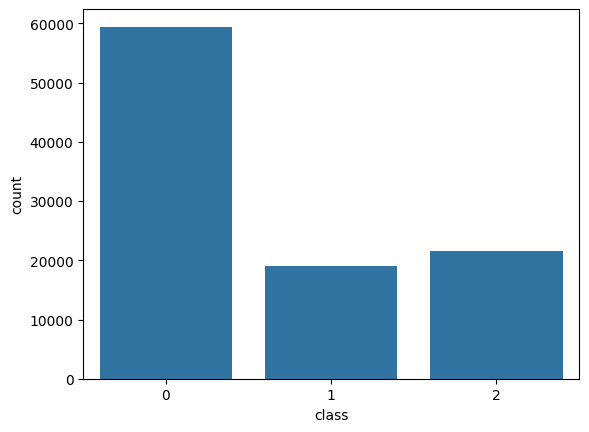

In [13]:
sns.countplot(x=data['class'])

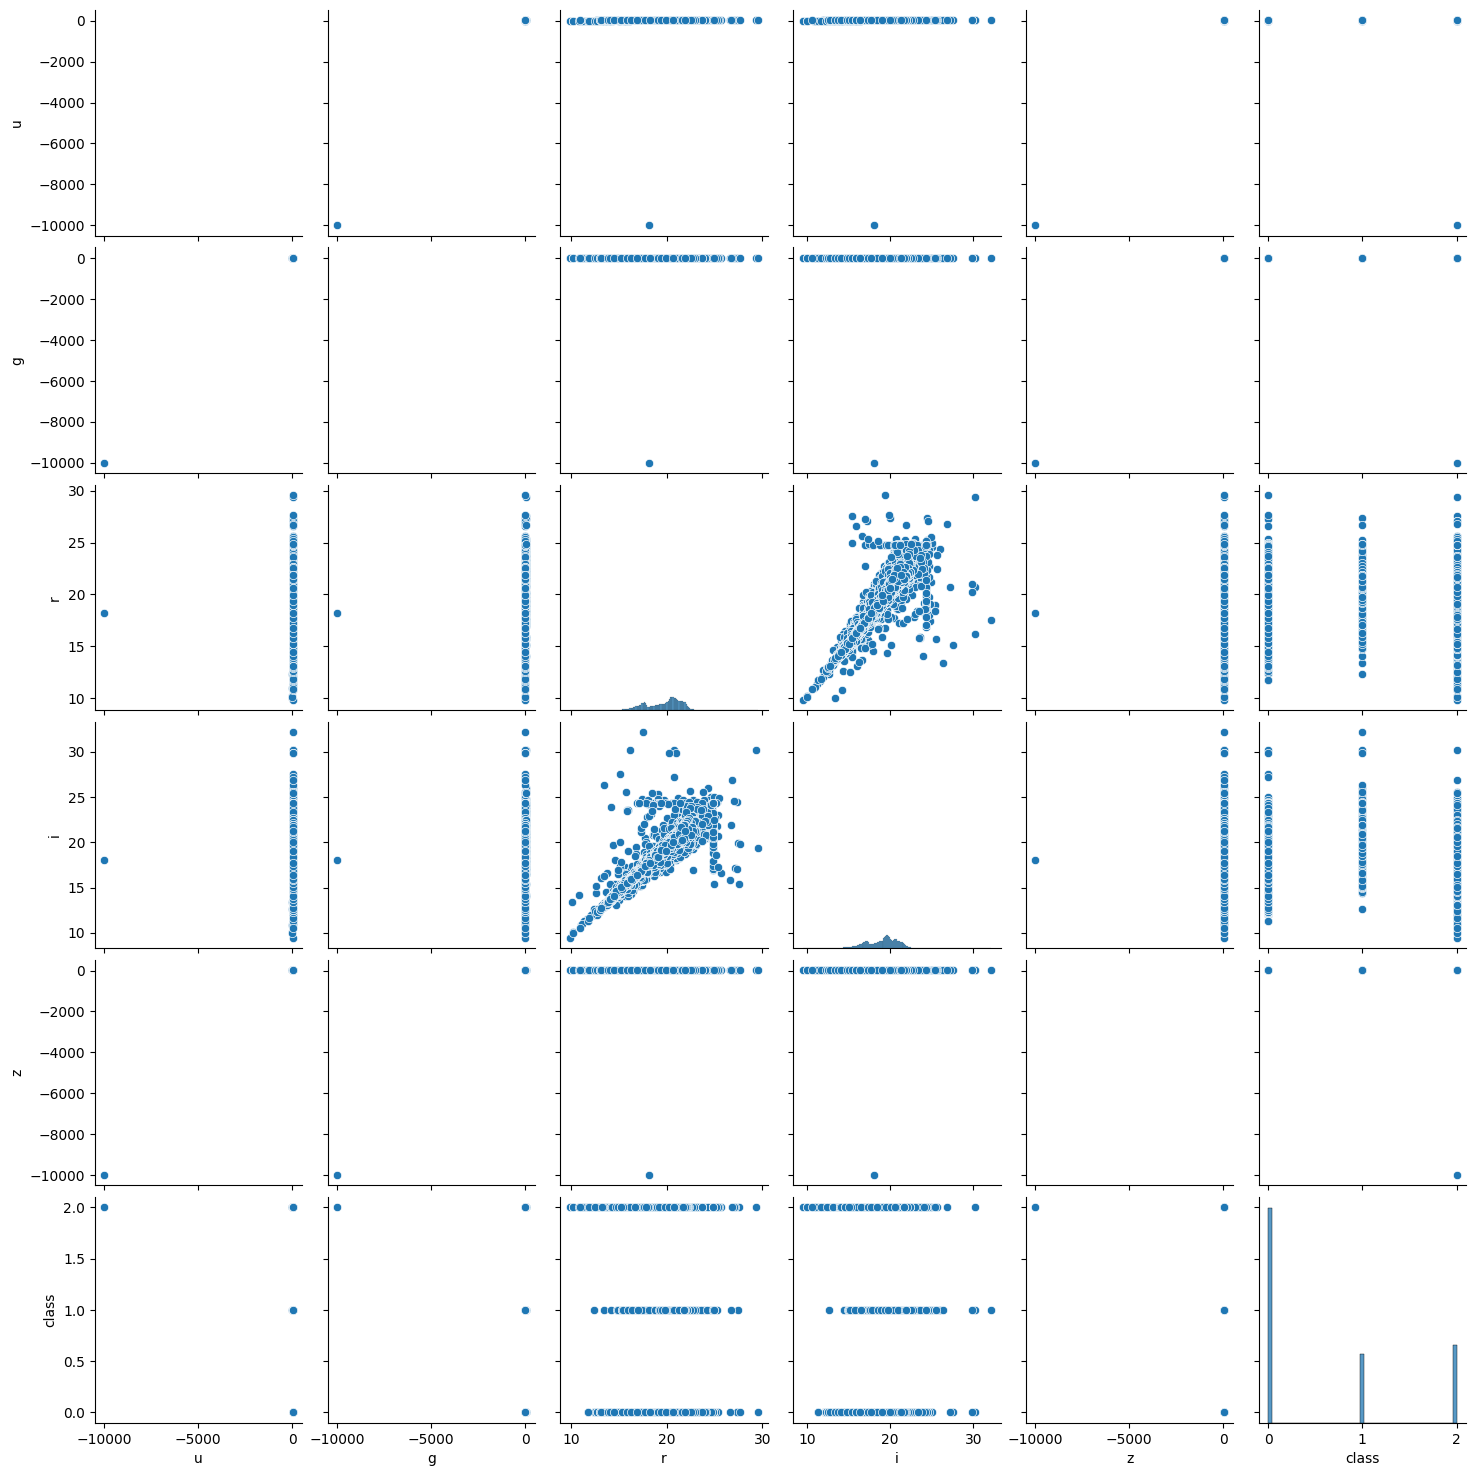

In [14]:
sns.pairplot(data[['u','g','r','i', 'z','class']])

In [15]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()


In [22]:
# Function to plot confusion matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()


Decision Tree Validation Accuracy: 0.9680


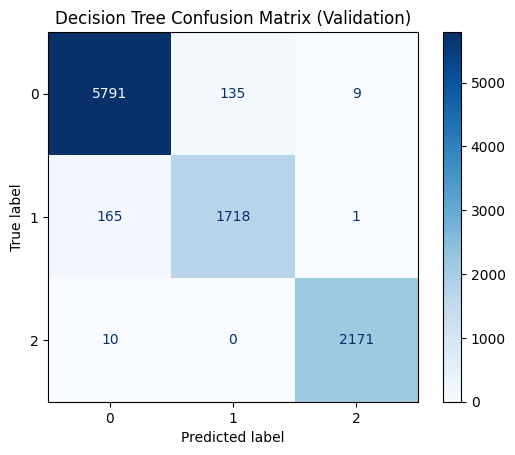

Decision Tree Test Accuracy: 0.9619


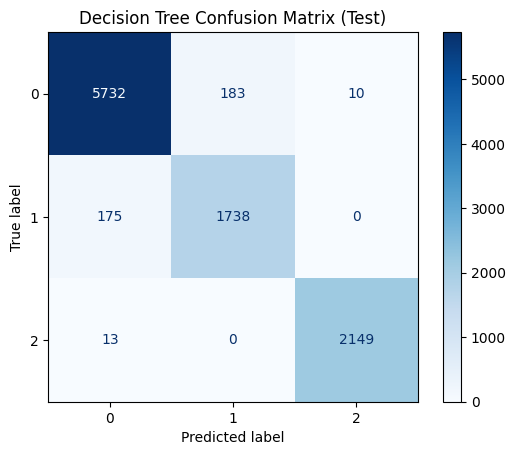

In [23]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Validate
dt_val_pred = dt_model.predict(X_val)
dt_val_accuracy = accuracy_score(y_val, dt_val_pred)
print(f'Decision Tree Validation Accuracy: {dt_val_accuracy:.4f}')
plot_confusion(y_val, dt_val_pred, "Decision Tree Confusion Matrix (Validation)")

# Test
dt_test_pred = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print(f'Decision Tree Test Accuracy: {dt_test_accuracy:.4f}')
plot_confusion(y_test, dt_test_pred, "Decision Tree Confusion Matrix (Test)")


Decision Tree (Pruned) Validation Accuracy: 0.9740


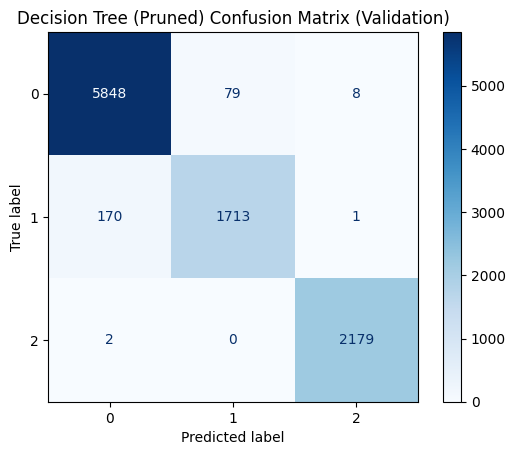

Decision Tree (Pruned) Test Accuracy: 0.9745


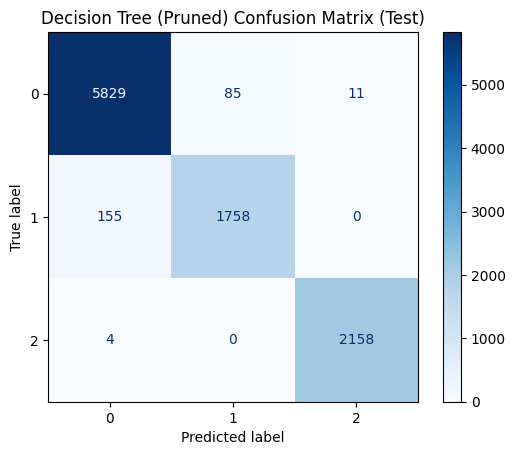

In [24]:
# pruned Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Validate
dt_val_pred = dt_model.predict(X_val)
dt_val_accuracy = accuracy_score(y_val, dt_val_pred)
print(f'Decision Tree (Pruned) Validation Accuracy: {dt_val_accuracy:.4f}')
plot_confusion(y_val, dt_val_pred, "Decision Tree (Pruned) Confusion Matrix (Validation)")

# Test
dt_test_pred = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
print(f'Decision Tree (Pruned) Test Accuracy: {dt_test_accuracy:.4f}')
plot_confusion(y_test, dt_test_pred, "Decision Tree (Pruned) Confusion Matrix (Test)")


SVM Validation Accuracy: 0.9572


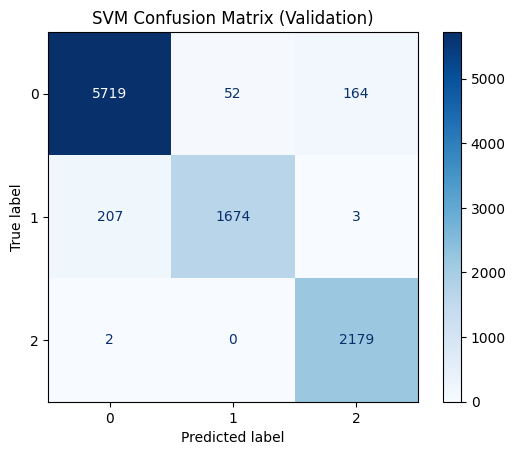

SVM Test Accuracy: 0.9593


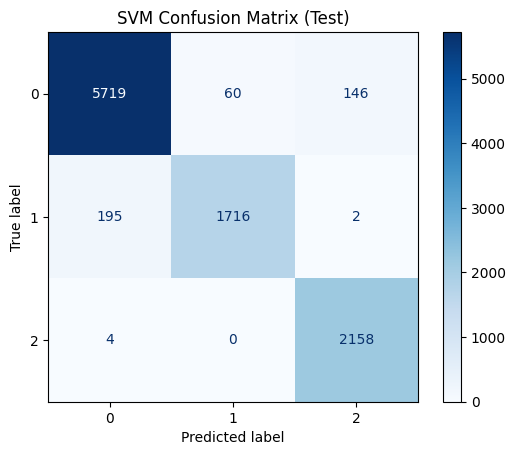

In [25]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Validate
svm_val_pred = svm_model.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_pred)
print(f'SVM Validation Accuracy: {svm_val_accuracy:.4f}')
plot_confusion(y_val, svm_val_pred, "SVM Confusion Matrix (Validation)")

# Test
svm_test_pred = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
print(f'SVM Test Accuracy: {svm_test_accuracy:.4f}')
plot_confusion(y_test, svm_test_pred, "SVM Confusion Matrix (Test)")

In [26]:
# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate on Test
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {nn_test_accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8652 - loss: 0.3640 - val_accuracy: 0.9521 - val_loss: 0.1564
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9593 - loss: 0.1395 - val_accuracy: 0.9641 - val_loss: 0.1335
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9619 - loss: 0.1282 - val_accuracy: 0.9615 - val_loss: 0.1274
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9645 - loss: 0.1182 - val_accuracy: 0.9625 - val_loss: 0.1242
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9643 - loss: 0.1177 - val_accuracy: 0.9519 - val_loss: 0.1462
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9630 - loss: 0.1176 - val_accuracy: 0.9556 - val_loss: 0.1510
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9667 - loss: 0.1105 - val_accuracy: 0.9664 - val_loss: 0.1144
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9653 - loss: 0.1125 

KNN Validation Accuracy: 0.9405


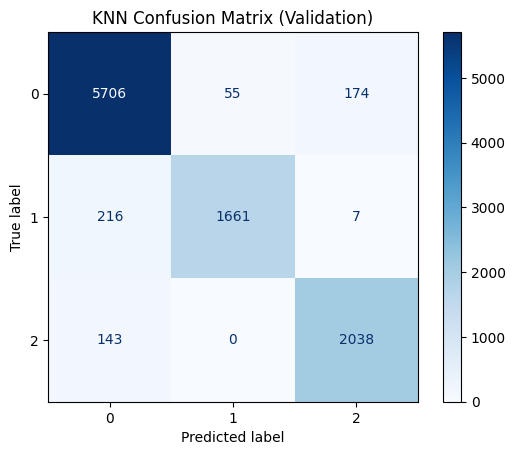

KNN Test Accuracy: 0.9413


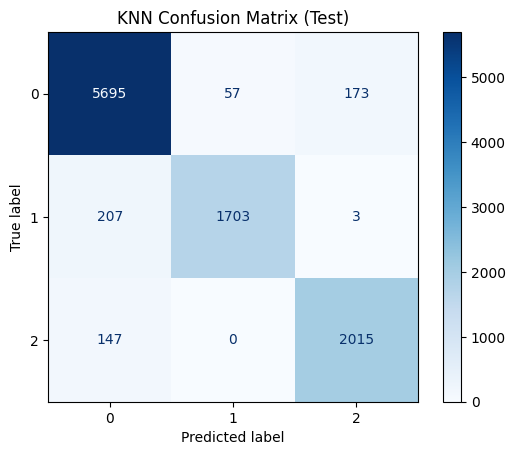

In [27]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Validate
knn_val_pred = knn_model.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
print(f'KNN Validation Accuracy: {knn_val_accuracy:.4f}')
plot_confusion(y_val, knn_val_pred, "KNN Confusion Matrix (Validation)")

# Test
knn_test_pred = knn_model.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
print(f'KNN Test Accuracy: {knn_test_accuracy:.4f}')
plot_confusion(y_test, knn_test_pred, "KNN Confusion Matrix (Test)")
